In [23]:
import tensorflow as tf
import cv2
from PIL import Image
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Activation, Reshape
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import BatchNormalization

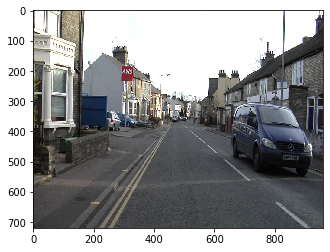

In [54]:
original_img=cv2.imread('img/img.jpg')[:, :, ::-1]
#display(original_img)
plt.imshow(original_img)

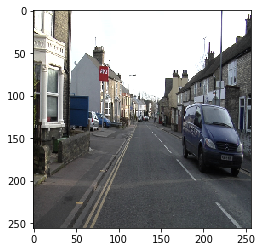

In [55]:
resized_img = cv2.resize(original_img,(256,256))
#display(resized_img)
plt.imshow(resized_img)

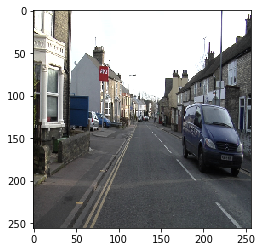

In [56]:
array_img = img_to_array(resized_img)/255
#display(imgs)
plt.imshow(array_img)

In [133]:
mask_img=cv2.imread('img/mask.png')
display(mask_img)
#plt.imshow(mask_img)

array([[[  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       ...,

       [[192,   0,   0],
        [192,   0,   0],
        [192,   0,   0],
        ...,
        [128,  64, 128],
        [128,  64, 128],
        [128,  64, 128]],

       [[192,   0,   0],
        [192,   0,   0],
        [192,   0,   0],
        ...,
        [128,  64, 128],
        [128,  64, 128],
        [128,  64, 128]],

       [[192,   0,   0],
        [192,   0,   0],
        [192,   0,   0],
        ...,
        [128,  64, 128],
        [128,  64, 128],
        [128,  64, 128]]

In [134]:
resized_mask_img = cv2.resize(mask_img,(256,256))
display(resized_mask_img)
#plt.imshow(resized_mask_img)

array([[[  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       ...,

       [[192,   0,   0],
        [192,   0,   0],
        [192,   0,   0],
        ...,
        [128,  64, 128],
        [128,  64, 128],
        [128,  64, 128]],

       [[192,   0,   0],
        [192,   0,   0],
        [192,   0,   0],
        ...,
        [128,  64, 128],
        [128,  64, 128],
        [128,  64, 128]],

       [[192,   0,   0],
        [192,   0,   0],
        [192,   0,   0],
        ...,
        [128,  64, 128],
        [128,  64, 128],
        [128,  64, 128]]

In [132]:
def category_label(labels, dims, n_labels):
    labels = [[0 for x in range(dims[0])] for y in range(dims[1])]
    x = np.zeros([dims[0], dims[1], n_labels])
    for i in range(dims[0]):
        for j in range(dims[1]):
            x[i, j, labels[i][j]] = 1
    x = x.reshape(dims[0] * dims[1], n_labels)
    return x
array_mask_img = category_label(resized_mask_img[:, :, 0],(256,256),20)
display(array_mask_img)
#plt.imshow(array_mask_img)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [143]:
imgs = []
labels = []
imgs.append(array_img)
labels.append(array_mask_img)
imgs = np.array(imgs)
labels = np.array(labels)

display(imgs)
display(labels)

array([[[[0.53333336, 0.5176471 , 0.44313726],
         [0.52156866, 0.5137255 , 0.44705883],
         [1.        , 1.        , 0.98039216],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.5882353 , 0.57254905, 0.49411765],
         [0.54509807, 0.5294118 , 0.47843137],
         [0.9647059 , 0.98039216, 0.9490196 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.5568628 , 0.54509807, 0.45490196],
         [0.59607846, 0.5803922 , 0.5294118 ],
         [0.9529412 , 0.972549  , 0.9411765 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.20392157, 0.20392157, 0.20784314],
         [0.20392157, 0.20392157, 0.21176471]

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]])